In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('/content/Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df = df.iloc[:,2:]
df.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df['Surname'] = df['Surname'].astype('category')
df['Surname'] = df['Surname'].cat.codes
df.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1115,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,1177,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,2040,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,289,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,1822,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df['Geography'] = df['Geography'].astype('category')
df['Geography'] = df['Geography'].cat.codes
df.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1115,619,0,Female,42,2,0.00,1,1,1,101348.88,1
1,1177,608,2,Female,41,1,83807.86,1,0,1,112542.58,0
2,2040,502,0,Female,42,8,159660.80,3,1,0,113931.57,1
3,289,699,0,Female,39,1,0.00,2,0,0,93826.63,0
4,1822,850,2,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
df['Gender'] = df['Gender'].astype('category')
df['Gender'] = df['Gender'].cat.codes
df.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1115,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,1177,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,2040,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,289,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,1822,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [8]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=234)

In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)

In [11]:
X_test = sc.transform(X_test)

In [12]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [13]:
classifier = Sequential()

In [14]:
classifier.add(Dense(6, activation='relu', input_shape = (X_train.shape[1], )))
classifier.add(Dropout(rate = 0.1))

In [15]:
classifier.add(Dense(6, activation='relu'))
classifier.add(Dropout(rate=0.1))

In [16]:
classifier.add(Dense(1, activation = 'sigmoid'))

In [17]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 72        
                                                                 
 dropout (Dropout)           (None, 6)                 0         
                                                                 
 dense_1 (Dense)             (None, 6)                 42        
                                                                 
 dropout_1 (Dropout)         (None, 6)                 0         
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
Total params: 121 (484.00 Byte)
Trainable params: 121 (484.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [19]:
history = classifier.fit(X_train, y_train, batch_size = 32, epochs = 200, validation_split = 0.1, verbose = 2)

Epoch 1/200
225/225 - 2s - loss: 0.5864 - accuracy: 0.7418 - val_loss: 0.4748 - val_accuracy: 0.8150 - 2s/epoch - 7ms/step
Epoch 2/200
225/225 - 0s - loss: 0.4962 - accuracy: 0.7936 - val_loss: 0.4374 - val_accuracy: 0.8150 - 413ms/epoch - 2ms/step
Epoch 3/200
225/225 - 0s - loss: 0.4659 - accuracy: 0.7964 - val_loss: 0.4180 - val_accuracy: 0.8163 - 415ms/epoch - 2ms/step
Epoch 4/200
225/225 - 0s - loss: 0.4520 - accuracy: 0.8001 - val_loss: 0.4059 - val_accuracy: 0.8150 - 387ms/epoch - 2ms/step
Epoch 5/200
225/225 - 0s - loss: 0.4433 - accuracy: 0.8011 - val_loss: 0.4000 - val_accuracy: 0.8238 - 402ms/epoch - 2ms/step
Epoch 6/200
225/225 - 0s - loss: 0.4386 - accuracy: 0.8053 - val_loss: 0.3932 - val_accuracy: 0.8238 - 383ms/epoch - 2ms/step
Epoch 7/200
225/225 - 0s - loss: 0.4318 - accuracy: 0.8075 - val_loss: 0.3881 - val_accuracy: 0.8250 - 403ms/epoch - 2ms/step
Epoch 8/200
225/225 - 0s - loss: 0.4292 - accuracy: 0.8089 - val_loss: 0.3857 - val_accuracy: 0.8275 - 430ms/epoch - 2ms/

In [20]:
y_pred = classifier.predict(X_test)
print(y_pred[:5])

63/63 [==============================] - 0s 2ms/step
[[0.19567925]
 [0.11377183]
 [0.16145544]
 [0.24576561]
 [0.02346415]]


In [21]:
y_pred = (y_pred > 0.5).astype(int)
print(y_pred[:5])

[[0]
 [0]
 [0]
 [0]
 [0]]


In [22]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

0.855

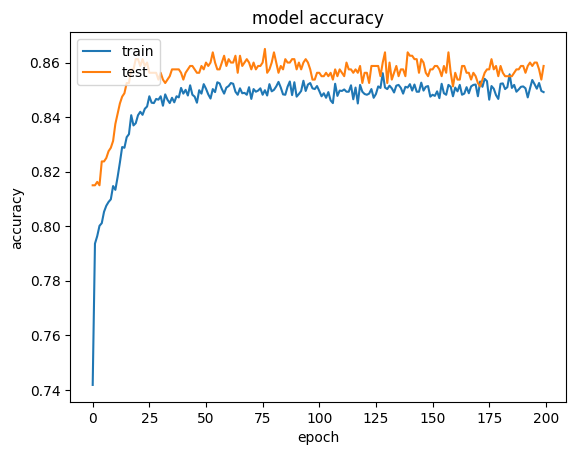

In [23]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [24]:
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, classification_report

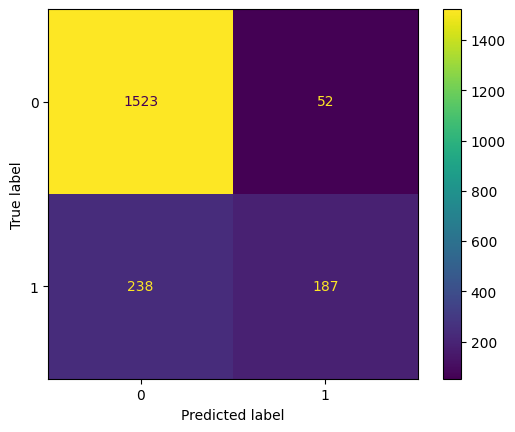

In [25]:
ConfusionMatrixDisplay.from_predictions(list(y_test), y_pred)

In [26]:
accuracy_score(y_test, y_pred)

0.855

In [27]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91      1575
           1       0.78      0.44      0.56       425

    accuracy                           0.85      2000
   macro avg       0.82      0.70      0.74      2000
weighted avg       0.85      0.85      0.84      2000

